In [18]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

# Method 1:

##  Using 1D distributions (Aux Figs.8a and 8b)

In [77]:
# mDV data (nTracks >= 2)
data = np.genfromtxt('./ATLAS_data/HEPData-ins1630632-v2-csv/Table17.csv',
                     delimiter=',',names=True,comments='#',
                     skip_footer=255,skip_header=10)

data = data[data['DV_mass_GeV'] > 3.0]
data10 = data[data['DV_mass_GeV'] > 10.0]

# nTracks data (requires mDV > 3)
dataN = np.genfromtxt('./ATLAS_data/HEPData-ins1630632-v2-csv/Table18.csv',
                     delimiter=',',names=True,comments='#',
                     skip_footer=50,skip_header=10)
 

In [88]:
ntot = sum(data['Number_of_observed_events'])
print('Observed events (mDV > 3, n(tracks) >=2) = %1.0f' %ntot)
print(ntot,sum(dataN['Number_of_observed_events'])) # Numbers should be equal, except for binning

Observed events (mDV > 3, n(tracks) >=2) = 17833
17833.0 18059.0


### Ratios of number of tracks (independent of mDV)

In [107]:
r3to2 = dataN[1]['Number_of_observed_events']/dataN[0]['Number_of_observed_events']
r3toAll = dataN[1]['Number_of_observed_events']/sum(dataN['Number_of_observed_events'])
r4toAll = dataN[2]['Number_of_observed_events']/sum(dataN['Number_of_observed_events'])
r5toAll = dataN[3]['Number_of_observed_events']/sum(dataN['Number_of_observed_events'])
print('(n(tracks) = 3)/(n(tracks) = 2) = %1.2e' %r3to2)
print('(n(tracks) = 3)/Total = %1.2e' %r3toAll)
print('(n(tracks) = 4)/Total = %1.2e' %r4toAll)
print('(n(tracks) = 5)/Total = %1.2e' %r5toAll)
print('Observed events (mDV > 3, n(tracks) = 3) = %1.0f' %(ntot*r3toAll))
print('Observed events (mDV > 3, n(tracks) = 4) = %1.0f' %(ntot*r4toAll))
print('Observed events (mDV > 3, n(tracks) >= 5) = %1.0f' %(ntot*r5toAll))

(n(tracks) = 3)/(n(tracks) = 2) = 2.78e-03
(n(tracks) = 3)/Total = 2.77e-03
(n(tracks) = 4)/Total = 1.11e-04
(n(tracks) = 5)/Total = 1.11e-04
Observed events (mDV > 3, n(tracks) = 3) = 49
Observed events (mDV > 3, n(tracks) = 4) = 2
Observed events (mDV > 3, n(tracks) >= 5) = 2


### Predictions for CRs (assuming mDV and n(tracks) are independent)

In [106]:

r10toAll = sum(data10['Number_of_observed_events'])/ntot
print('Full SR selection:')
print('Observed events (mDV > 10, n(tracks) >= 2) = %1.2f' %(ntot*r10toAll))
print('Observed events (mDV > 10, n(tracks) = 3) = %1.2f' %(ntot*r10toAll*r3toAll))
print('Observed events (mDV > 10, n(tracks) = 4) = %1.2f' %(ntot*r10toAll*r4toAll))
print('Observed events (mDV > 10, n(tracks) = 5) = %1.2f' %(ntot*r10toAll*r5toAll))

print()
print('-'*50)
print('Event preselection:')

eps_SR = 5.1e-3 # event selection transfer factor quoted by ATLAS which rescale the event preselection to the Full SR selection
atlas_tab2 = {'(mDV > 10, n(tracks) = 3)' : 3093,
              '(mDV > 10, n(tracks) = 4)' : 9+177,
              '(mDV > 10, n(tracks) >= 5)' : 1+1+3+5}

print('Observed events (mDV > 10, n(tracks) >= 2) = %1.2f' %(ntot*r10toAll/eps_SR))
print('Observed events (mDV > 10, n(tracks) = 3) = %1.2f (atlas = %1.2f)' %(ntot*r10toAll*r3toAll/eps_SR,atlas_tab2['(mDV > 10, n(tracks) = 3)']))
print('Observed events (mDV > 10, n(tracks) = 4) = %1.2f (atlas = %1.2f)' %(ntot*r10toAll*r4toAll/eps_SR,atlas_tab2['(mDV > 10, n(tracks) = 4)']))
print('Observed events (mDV > 10, n(tracks) >= 5) = %1.2f (atlas = %1.2f)' %(ntot*r10toAll*r5toAll/eps_SR,atlas_tab2['(mDV > 10, n(tracks) >= 5)']))


Full SR selection:
Observed events (mDV > 10, n(tracks) >= 2) = 2845.00
Observed events (mDV > 10, n(tracks) = 3) = 7.88
Observed events (mDV > 10, n(tracks) = 4) = 0.32
Observed events (mDV > 10, n(tracks) = 5) = 0.32

--------------------------------------------------
Event preselection:
Observed events (mDV > 10, n(tracks) >= 2) = 557843.14
Observed events (mDV > 10, n(tracks) = 3) = 1544.50 (atlas = 3093.00)
Observed events (mDV > 10, n(tracks) = 4) = 61.78 (atlas = 186.00)
Observed events (mDV > 10, n(tracks) >= 5) = 61.78 (atlas = 10.00)


### Exponential Fit to observed data

In [118]:
def fit(mDV,a,b,c):
    return a*np.exp(-b*mDV)+c

dataFit = data[(data['DV_mass_GeV'] > 3.0) & (data['DV_mass_GeV'] < 12.0)]
popt, fitF = curve_fit(fit, dataFit['DV_mass_GeV'], dataFit['Number_of_observed_events'])

dataFit = data[(data['DV_mass_GeV'] > 3.0) & (data['DV_mass_GeV'] < 10.0)]
popt, fitF = curve_fit(fit, dataFit['DV_mass_GeV'], dataFit['Number_of_observed_events'],p0=popt)
# print(popt)


/tmp/ipykernel_193064/558710329.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*mDV)+c


### Plots

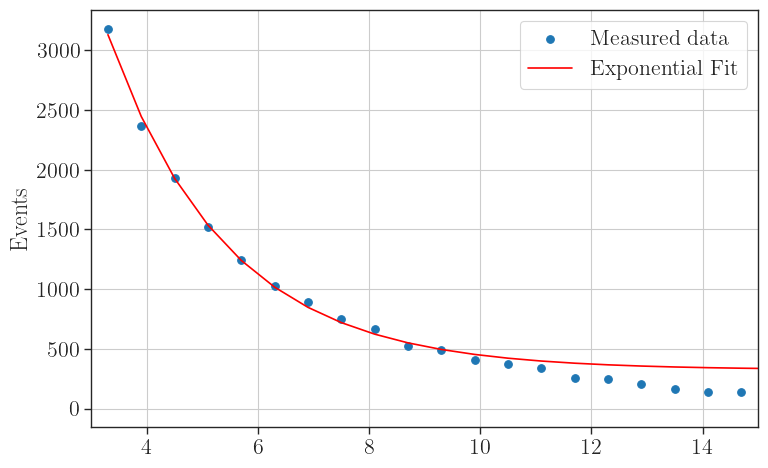

In [150]:
fig = plt.figure(figsize=(8,5))
dataSR = data[data['DV_mass_GeV'] >= 10.0]
nobs_SR = sum(dataSR['Number_of_observed_events'])
xyFit = np.array([[mDV,fit(mDV,a=popt[0],b=popt[1],c=popt[2])] for mDV in data['DV_mass_GeV']])

x = data['DV_mass_GeV']
y = data['Number_of_observed_events']
plt.scatter(x,y,s=30,label='Measured data')
plt.plot(xyFit[:,0],xyFit[:,1],c='red',label='Exponential Fit')
# plt.yscale('log')
plt.xlim(3.,15.)
plt.ylabel('Events')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

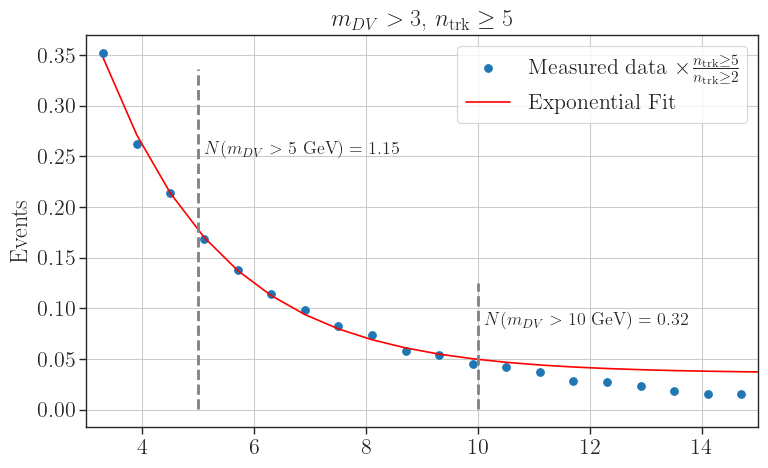

In [144]:
fig = plt.figure(figsize=(8,5))
dataSR = data[data['DV_mass_GeV'] >= 10.0]
nobs_SR = sum(dataSR['Number_of_observed_events'])
transfer_factor = r5toAll
xyFit = np.array([[mDV,transfer_factor*fit(mDV,a=popt[0],b=popt[1],c=popt[2])] for mDV in data['DV_mass_GeV']])

x = data['DV_mass_GeV']
y = data['Number_of_observed_events']*transfer_factor
plt.scatter(x,y,s=30,label=r'Measured data $\times \frac{n_{\rm trk} \geq 5}{n_{\rm trk} \geq 2}$')
plt.plot(xyFit[:,0],xyFit[:,1],c='red',label='Exponential Fit')

plt.vlines(x=10.,ymax=3*max(y[x>10.]),ymin=min(y[x>10.]),linewidth=2,linestyles='dashed',colors='gray')
n10 = sum(data[data['DV_mass_GeV'] >= 10.0]['Number_of_observed_events'])*transfer_factor
plt.text(10.1,2*max(y[x>10.]),r'$N(m_{DV} > 10 \mbox{ GeV}) = %1.2f$' %n10,fontsize=13)

plt.vlines(x=5.,ymax=2*max(y[x>5.]),ymin=min(y[x>5.]),linewidth=2,linestyles='dashed',colors='gray')
n5 = sum(data[data['DV_mass_GeV'] >= 5.0]['Number_of_observed_events'])*transfer_factor
plt.text(5.1,1.5*max(y[x>5.]),r'$N(m_{DV} > 5 \mbox{ GeV}) = %1.2f$' %n5,fontsize=13)


# plt.yscale('log')
plt.xlim(3.,15.)
plt.ylabel('Events')
plt.title(r'$m_{DV} > 3$, $n_{\rm trk} \geq 5$' %(nobs_SR*transfer_factor))
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Method 2:

##  Using 2D distributions (Fig.7)

In [153]:
data_obs = np.genfromtxt('./ATLAS_data/HEPData-ins1630632-v2-csv/Table6.csv',
                         delimiter=',',skip_header=11,skip_footer=113)

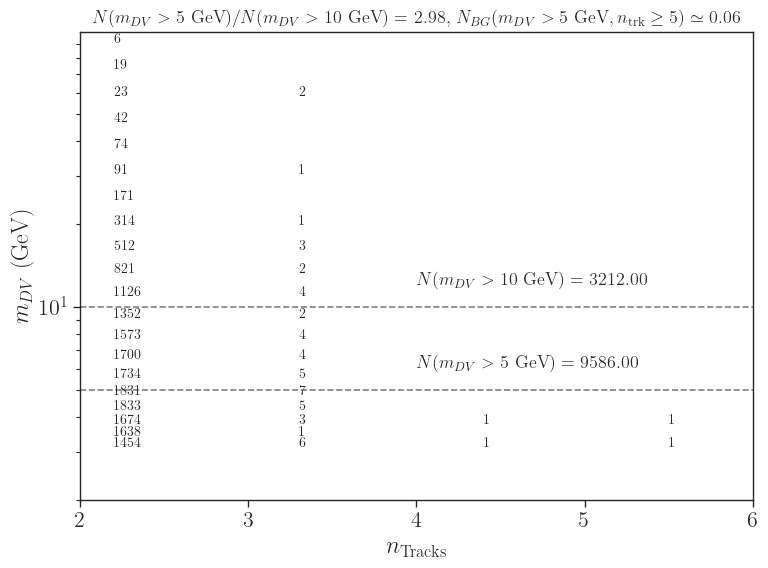

In [187]:
fig = plt.figure(figsize=(8,6))
mDV_bins = np.sort(np.unique(data_obs[:,1]))
n_bins = np.sort((np.unique(data_obs[:,0])))

n10 = 0.0
n5 = 0.0
nBG = 0.02
for ipt,pt in enumerate(data_obs):
    if pt[-1] == 0.0:
        continue
    if pt[1] >= 10.0:
        n10 += pt[-1]
    if pt[1] >= 5.0:
        n5 += pt[-1]        
    plt.text(1.1*pt[0],pt[1],'%i' %pt[-1],fontsize=10)
    
nBG = 0.02*(n5/n10)

plt.hlines(y=10.0,xmin=2.,xmax=max(n_bins),colors='gray',linestyle='dashed')
plt.text(4.0,12.0,r'$N(m_{DV} > 10 \mbox{ GeV}) = %1.2f$' %n10,fontsize=13)

plt.hlines(y=5.0,xmin=2.,xmax=max(n_bins),colors='gray',linestyle='dashed')
plt.text(4.0,6.0,r'$N(m_{DV} > 5 \mbox{ GeV}) = %1.2f$' %n5,fontsize=13)
# plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$m_{DV}$ (GeV)')
plt.xlabel(r'$n_{\rm Tracks}$')
plt.ylim(2,1.1*mDV_bins.max())
plt.xlim(2,6)
plt.xticks(range(2,7))
plt.title(r'$N(m_{DV} > 5 \mbox{ GeV})/N(m_{DV} > 10 \mbox{ GeV}) =$ %1.2f, $N_{BG}(m_{DV} > 5 \mbox{ GeV},n_{\rm trk} \geq 5) \simeq $ %1.2f' %((n5/n10),nBG),fontsize=13)
plt.tight_layout()
plt.show()


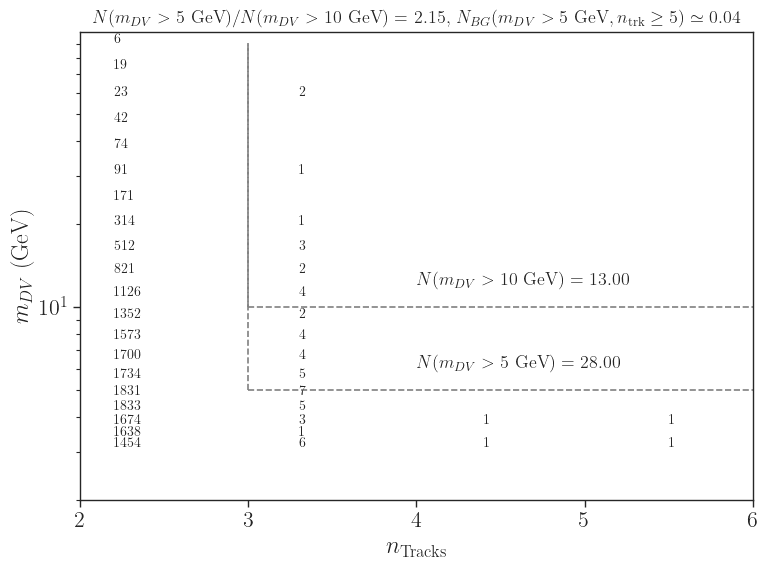

In [186]:
fig = plt.figure(figsize=(8,6))
mDV_bins = np.sort(np.unique(data_obs[:,1]))
n_bins = np.sort((np.unique(data_obs[:,0])))

n10 = 0.0
n5 = 0.0
nBG = 0.02
for ipt,pt in enumerate(data_obs):
    if pt[-1] == 0.0:
        continue
    if pt[1] >= 10.0 and pt[0] >= 3.0:
        n10 += pt[-1]
    if pt[1] >= 5.0 and pt[0] >= 3.0:
        n5 += pt[-1]        
    plt.text(1.1*pt[0],pt[1],'%i' %pt[-1],fontsize=10)
    
nBG = nBG*(n5/n10)

plt.hlines(y=10.0,xmin=3.,xmax=max(n_bins),colors='gray',linestyle='dashed')
plt.vlines(x=3.0,ymin=10.,ymax=max(mDV_bins),colors='gray',linestyle='dashed')
plt.text(4.0,12.0,r'$N(m_{DV} > 10 \mbox{ GeV}) = %1.2f$' %n10,fontsize=13)

plt.vlines(x=3.0,ymin=5.,ymax=max(mDV_bins),colors='gray',linestyle='dashed')
plt.hlines(y=5.0,xmin=3.,xmax=max(n_bins),colors='gray',linestyle='dashed')
plt.text(4.0,6.0,r'$N(m_{DV} > 5 \mbox{ GeV}) = %1.2f$' %n5,fontsize=13)
# plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$m_{DV}$ (GeV)')
plt.xlabel(r'$n_{\rm Tracks}$')
plt.ylim(2,1.1*mDV_bins.max())
plt.xlim(2,6)
plt.xticks(range(2,7))
plt.title(r'$N(m_{DV} > 5 \mbox{ GeV})/N(m_{DV} > 10 \mbox{ GeV}) =$ %1.2f, $N_{BG}(m_{DV} > 5 \mbox{ GeV},n_{\rm trk} \geq 5) \simeq $ %1.2f' %((n5/n10),nBG),fontsize=13)
plt.tight_layout()
plt.show()


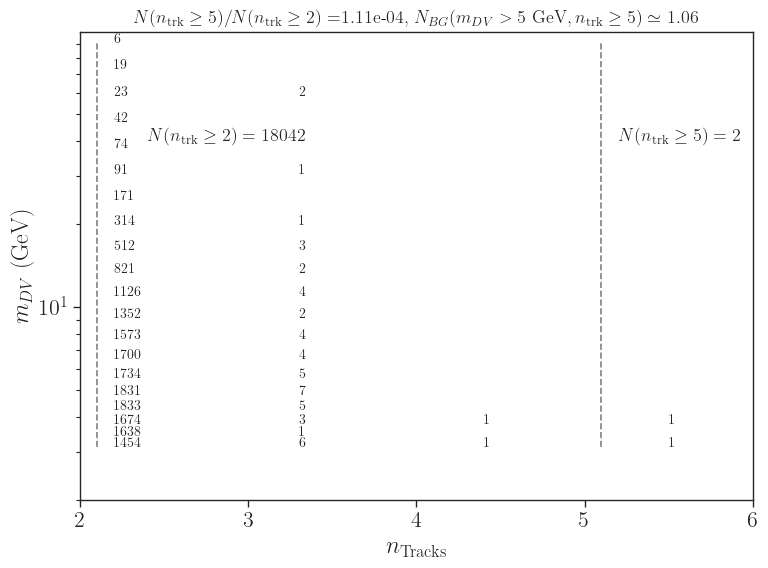

In [183]:
fig = plt.figure(figsize=(8,6))
mDV_bins = np.sort(np.unique(data_obs[:,1]))
n_bins = np.sort((np.unique(data_obs[:,0])))

nBG = 0.0

nt2 = 0.0
nt5 = 0.0
for ipt,pt in enumerate(data_obs):
    if pt[-1] == 0.0:
        continue
    if pt[1] >= 5.0:
        nBG += pt[-1]
    if pt[0] >= 5.0:
        nt5 += pt[-1]
    if pt[0] >= 2.0:
        nt2 += pt[-1]        
    plt.text(1.1*pt[0],pt[1],'%i' %pt[-1],fontsize=10)

# Estimated BG = N(mDV > 5)*(nTrack > 5)/(nTrack > 2):
nBG = nBG*(nt5/nt2)

plt.vlines(x=2.1,ymin=min(mDV_bins),ymax=max(mDV_bins),colors='gray',linestyle='dashed')
plt.text(2.4,40.0,r'$N(n_{\rm trk} \geq 2) = %1.0f$' %nt2,fontsize=13)

plt.vlines(x=5.1,ymin=min(mDV_bins),ymax=max(mDV_bins),colors='gray',linestyle='dashed')
plt.text(5.2,40.0,r'$N(n_{\rm trk} \geq 5) = %1.0f$' %nt5,fontsize=13)
# plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$m_{DV}$ (GeV)')
plt.xlabel(r'$n_{\rm Tracks}$')
plt.ylim(2,1.1*mDV_bins.max())
plt.xlim(2,6)
plt.xticks(range(2,7))
plt.title(r'$N(n_{\rm trk} \geq 5)/N(n_{\rm trk} \geq 2) = $%1.2e, $N_{BG}(m_{DV} > 5 \mbox{ GeV},n_{\rm trk} \geq 5) \simeq $ %1.2f' %((nt5/nt2),nBG),fontsize=13)
plt.tight_layout()
plt.show()
